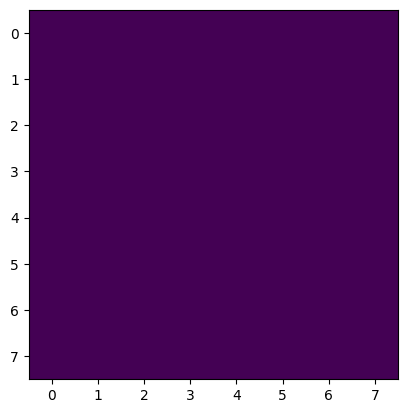

[1, 16, 37, 32, 3, 18, 47, 22]
[38, 31, 2, 17, 48, 21, 4, 19]
[15, 36, 49, 54, 33, 64, 23, 46]
[30, 39, 60, 35, 50, 53, 20, 5]
[61, 14, 55, 52, 63, 34, 45, 24]
[40, 29, 62, 59, 56, 51, 6, 9]
[13, 58, 27, 42, 11, 8, 25, 44]
[28, 41, 12, 57, 26, 43, 10, 7]
棋盘图片已保存为 horse_chessboard.png
完成！


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List
import time

class Location:
    def __init__(self, x: int, y: int):
        self.x = x
        self.y = y

class HorseChessboard:
    finished = False

    def __init__(self, rows: int, cols: int, visualize: bool = True):
        self.rows = rows
        self.cols = cols
        self.chessboard = [[0 for _ in range(cols)] for _ in range(rows)]
        self.visited = [False] * (rows * cols)
        self.visualize = visualize
        if self.visualize:
            self.fig, self.ax = plt.subplots()
            self.img = self.ax.imshow(np.zeros((rows, cols)), cmap='viridis', vmin=0, vmax=rows*cols)
            self.texts = [[self.ax.text(j, i, '', ha='center', va='center', color='w') 
                           for j in range(cols)] for i in range(rows)]
            plt.ion()
            plt.show()

    def show(self):
        for row in self.chessboard:
            print(row)

    def update_plot(self):
        """更新 matplotlib 显示"""
        board_array = np.array(self.chessboard)
        self.img.set_data(board_array)
        for i in range(self.rows):
            for j in range(self.cols):
                self.texts[i][j].set_text(str(board_array[i][j]) if board_array[i][j] > 0 else '')
        self.fig.canvas.draw()
        self.fig.canvas.flush_events()
        time.sleep(0.001)  # 可以调整显示速度

    def traversal_chessboard(self, row: int, col: int, step: int):
        self.visited[row * self.cols + col] = True
        self.chessboard[row][col] = step

        # if self.visualize:
        #     self.update_plot()

        next_locations = self.next_location(Location(col, row))
        # Warnsdorff 启发式排序
        next_locations.sort(key=lambda loc: len(self.next_location(loc)))

        for loc in next_locations:
            if not self.visited[loc.y * self.cols + loc.x]:
                self.traversal_chessboard(loc.y, loc.x, step + 1)

        if step < len(self.visited) and not HorseChessboard.finished:
            self.chessboard[row][col] = 0
            self.visited[row * self.cols + col] = False
            # if self.visualize:
            #     self.update_plot()
        else:
            HorseChessboard.finished = True

    def next_location(self, location: Location) -> List[Location]:
        x, y = location.x, location.y
        moves = []

        if x - 2 >= 0 and y - 1 >= 0:
            moves.append(Location(x - 2, y - 1))
        if x - 1 >= 0 and y - 2 >= 0:
            moves.append(Location(x - 1, y - 2))
        if x + 1 < self.cols and y - 2 >= 0:
            moves.append(Location(x + 1, y - 2))
        if x + 2 < self.cols and y - 1 >= 0:
            moves.append(Location(x + 2, y - 1))
        if x + 2 < self.cols and y + 1 < self.rows:
            moves.append(Location(x + 2, y + 1))
        if x + 1 < self.cols and y + 2 < self.rows:
            moves.append(Location(x + 1, y + 2))
        if x - 1 >= 0 and y + 2 < self.rows:
            moves.append(Location(x - 1, y + 2))
        if x - 2 >= 0 and y + 1 < self.rows:
            moves.append(Location(x - 2, y + 1))

        return moves

    def save_image(self, filename='horse_chessboard.png'):
        """保存最终棋盘为图片"""
        board_array = np.array(self.chessboard)
        plt.figure(figsize=(6,6))
        plt.imshow(board_array, cmap='viridis', vmin=0, vmax=self.rows*self.cols)
        for i in range(self.rows):
            for j in range(self.cols):
                plt.text(j, i, str(board_array[i][j]), ha='center', va='center', color='w')
        plt.axis('off')
        plt.savefig(filename, dpi=300)
        plt.close()
        print(f"棋盘图片已保存为 {filename}")


if __name__ == "__main__":
    rows, cols = 8, 8
    horse = HorseChessboard(rows, cols, visualize=True)
    horse.traversal_chessboard(0, 0, 1)  # 从 (0,0) 开始
    horse.show()
    horse.save_image("horse_chessboard.png")
    print("完成！")
